# Final Project

## Credit Default Prediction using Supervised Machine Learning Techniques


### Step 1: Problem Definition

In [1]:
# Step 1: Define the Problem

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Loan_default.csv')

# Define the problem: Predict loan default based on credit data
"""
Goal: The aim of this project is to develop a machine learning model that can predict
whether a loan applicant will default on a personal loan or not, based on their financial
and demographic information. This is a binary classification task where the target variable is 'Default'.
"""

# Print first few rows of the dataset to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

# Check for data types and missing values
print("\nData Types and Missing Values:")
print(data.info())

# Understand basic statistics
print("\nStatistical Summary of the Data:")
print(data.describe())


Saving Loan_default.csv to Loan_default.csv
First 5 rows of the dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time   

### Step 2 Data Cleaning and Preprocessing

In [2]:
# Step 2: Data Cleaning and Preprocessing

# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Verify missing values (already checked in Step 1, but let's reconfirm)
print("Checking for missing values:")
print(data.isnull().sum())

# Step 2.1: Encode categorical variables
# List of categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus',
                       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Step 2.2: Scale/Normalize numerical features
# List of numerical columns to scale
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                     'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Separate target variable and features
X = data.drop(['LoanID', 'Default'], axis=1)  # Drop LoanID (not useful for prediction) and 'Default' (target)
y = data['Default']

# Step 2.3: Preprocessing - Scaling numerical features and encoding categorical variables
# Preprocessing for numerical data (Standard Scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical data (One-hot encoding)
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Step 2.4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2.5: Create a pipeline to apply the transformations
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the transformations to the training and test data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

print("Data preprocessing completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Checking for missing values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Data preprocessing completed.
Training set shape: (178742, 24)
Test set shape: (76605, 24)


### Step 3 Exploratory Data Analysis

#### Step 3.1

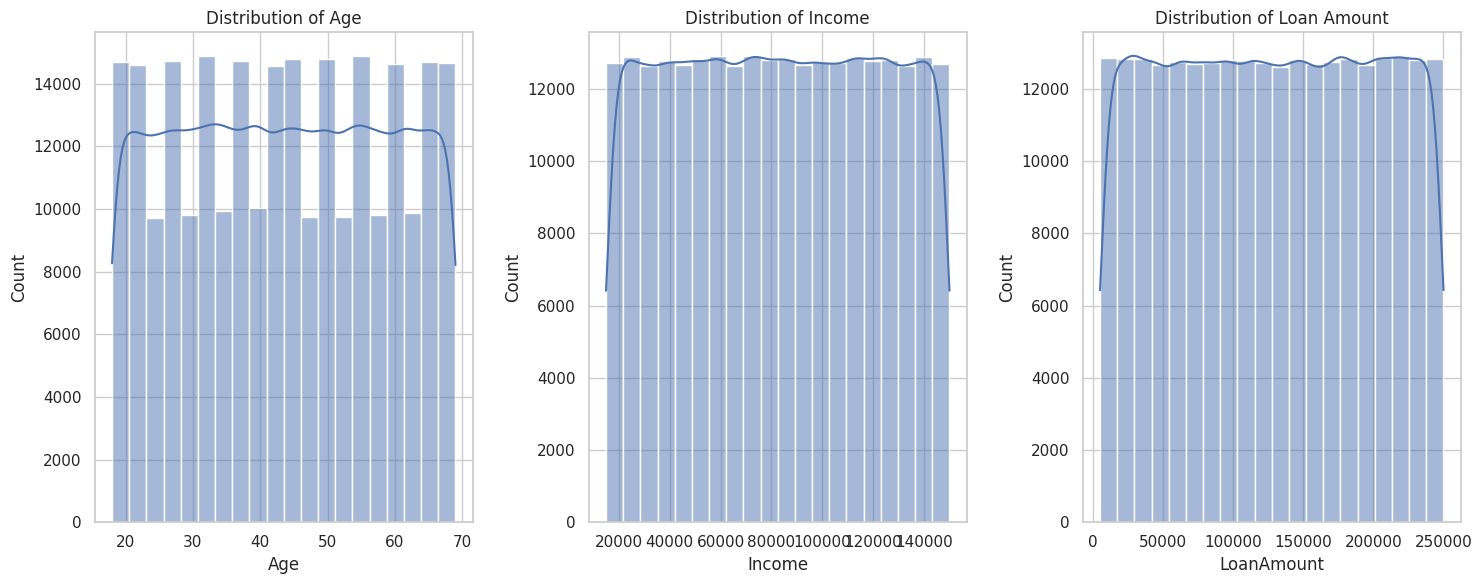

In [5]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot distribution of key numerical features: Age, Income, LoanAmount
plt.figure(figsize=(15, 6))

# Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Income
plt.subplot(1, 3, 2)
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribution of Income')

# Distribution of LoanAmount
plt.subplot(1, 3, 3)
sns.histplot(data['LoanAmount'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')

plt.tight_layout()
plt.show()


#### Step 3.2 Correlation Analysis

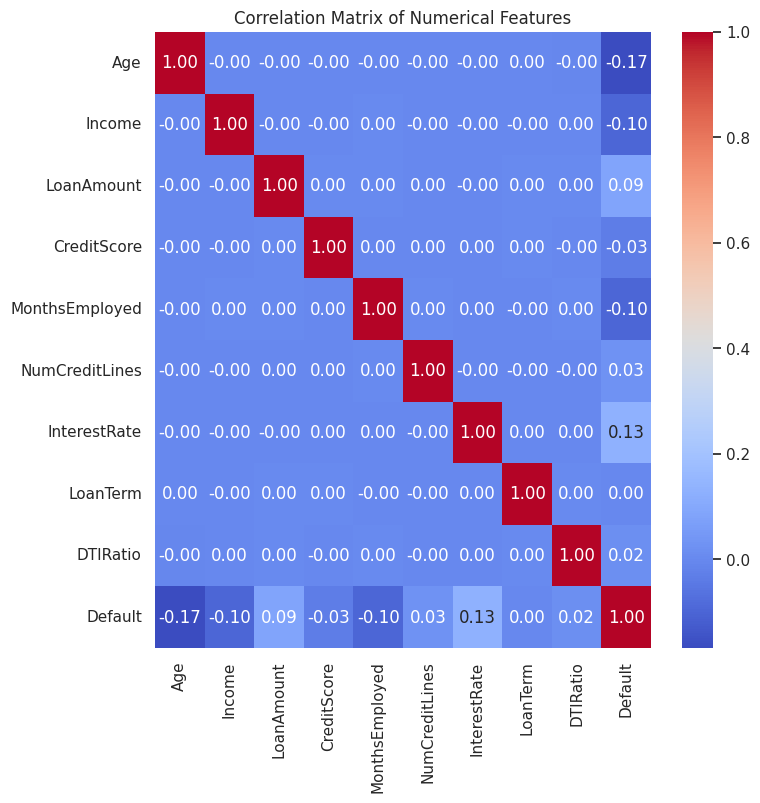

In [6]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix of numerical variables
plt.figure(figsize=(8, 8))
correlation_matrix = numeric_data.corr()

# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### Step 3.3: Outlier Detection using Boxplots

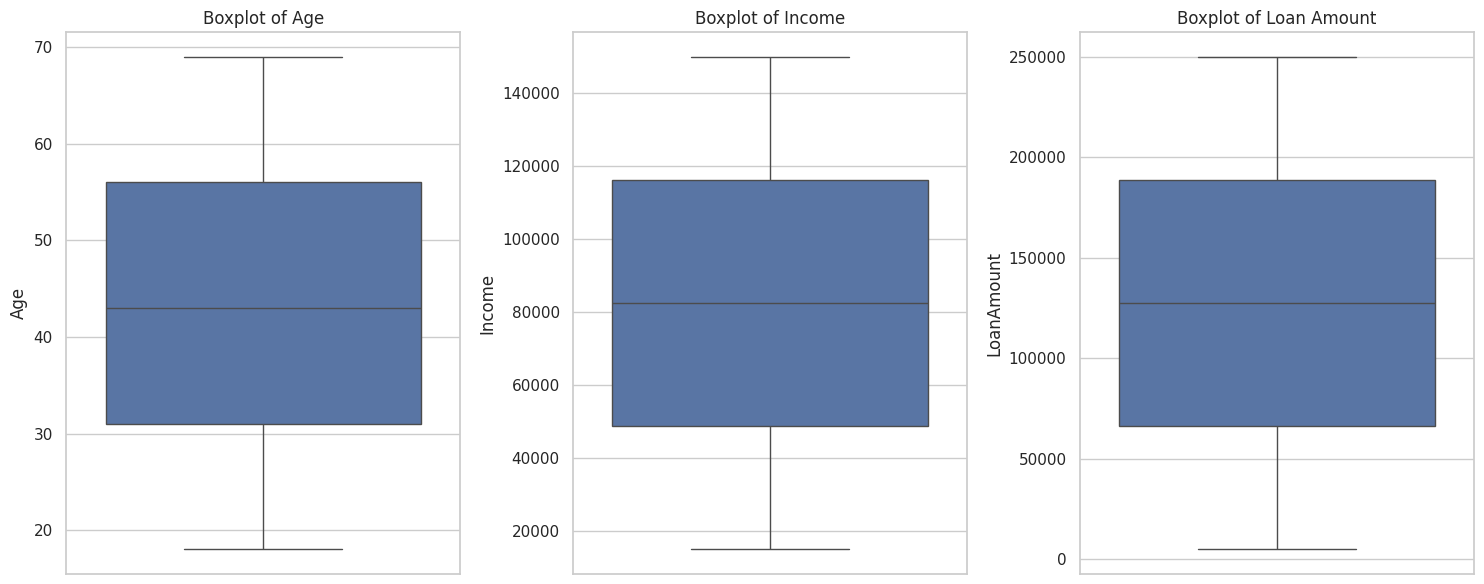

In [7]:
# Boxplots to detect outliers in key numerical variables
plt.figure(figsize=(15, 6))

# Boxplot for Age
plt.subplot(1, 3, 1)
sns.boxplot(y='Age', data=data)
plt.title('Boxplot of Age')

# Boxplot for Income
plt.subplot(1, 3, 2)
sns.boxplot(y='Income', data=data)
plt.title('Boxplot of Income')

# Boxplot for LoanAmount
plt.subplot(1, 3, 3)
sns.boxplot(y='LoanAmount', data=data)
plt.title('Boxplot of Loan Amount')

plt.tight_layout()
plt.show()


#### Step 3.4: Z-score for Outlier Detection

In [8]:
from scipy import stats

# Calculate Z-scores for Age, Income, LoanAmount
data['Age_zscore'] = stats.zscore(data['Age'])
data['Income_zscore'] = stats.zscore(data['Income'])
data['LoanAmount_zscore'] = stats.zscore(data['LoanAmount'])

# Display rows where the Z-score is above 3 or below -3 (outliers)
outliers = data[(data['Age_zscore'].abs() > 3) |
                (data['Income_zscore'].abs() > 3) |
                (data['LoanAmount_zscore'].abs() > 3)]

print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['Age', 'Income', 'LoanAmount', 'Age_zscore', 'Income_zscore', 'LoanAmount_zscore']])


Number of outliers detected: 0
Empty DataFrame
Columns: [Age, Income, LoanAmount, Age_zscore, Income_zscore, LoanAmount_zscore]
Index: []


#### More EDA

In [11]:
# Set the Seaborn theme for the visualizations
sns.set(style="whitegrid")

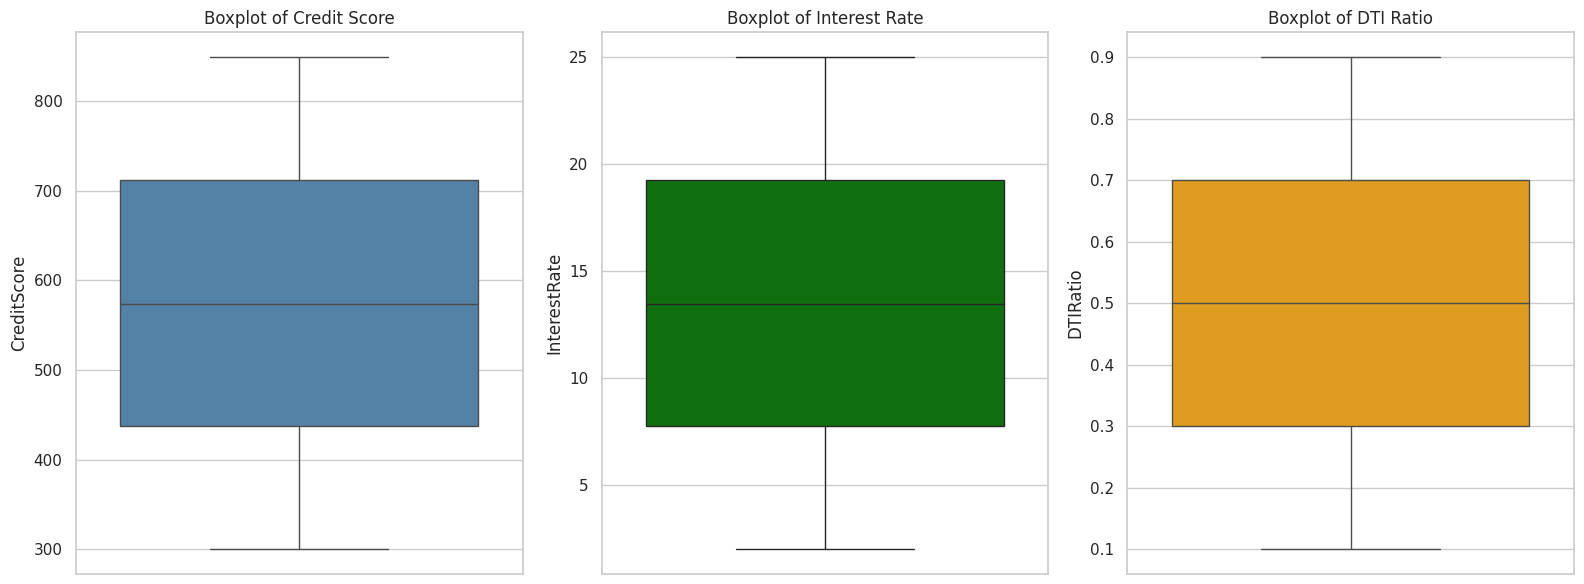

In [14]:
# Plot the boxplots for CreditScore, InterestRate, and DTIRatio
plt.figure(figsize=(16, 6))

# Credit Score Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=data['CreditScore'], color='steelblue')
plt.title('Boxplot of Credit Score')

# Interest Rate Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=data['InterestRate'], color='green')
plt.title('Boxplot of Interest Rate')

# DTIRatio Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=data['DTIRatio'], color='orange')
plt.title('Boxplot of DTI Ratio')

plt.tight_layout()
plt.show()


<ipython-input-15-91f532cf4b76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=data, palette='Set2')


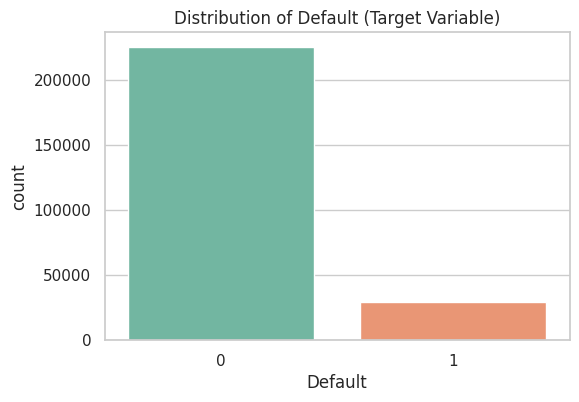

In [15]:
# Plot the bar plot for the Default target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data, palette='Set2')
plt.title('Distribution of Default (Target Variable)')
plt.show()


<ipython-input-16-40a1007b7d7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='LoanAmount', data=data, palette='Set1')


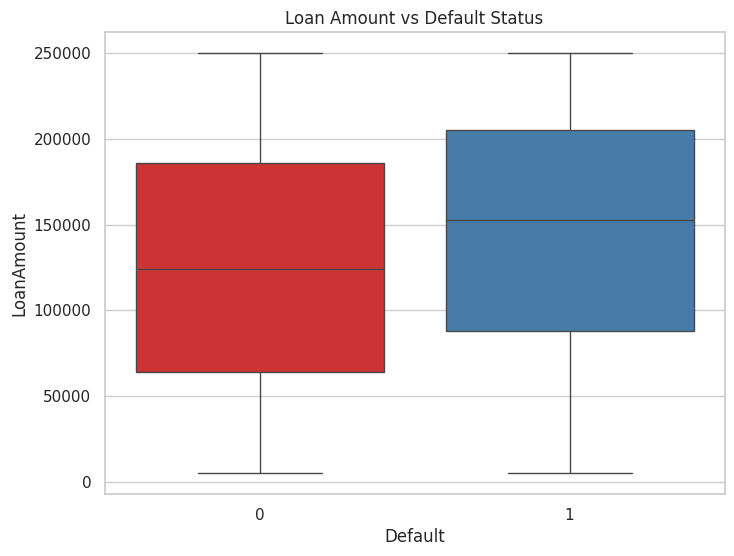

In [16]:
# Visualizing Loan Amount against Default status to check for patterns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Default', y='LoanAmount', data=data, palette='Set1')
plt.title('Loan Amount vs Default Status')
plt.show()


### Step 4

In [9]:
# Step 4: Model Selection and Training

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# Reminder: We are using models that handle non-linearity and feature interaction well because
# the correlation analysis showed weak linear relationships between the features and the target variable (Default).

# Step 4.1: Logistic Regression (Baseline model)
# Note: Logistic Regression might not perform well here due to weak correlations and non-linearity in the data.
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_logreg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Step 4.2: Decision Tree Classifier
# Reason: Decision Trees handle non-linearity and feature interactions well, which is important based on our EDA.
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree AUC-ROC:", roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Step 4.3: Random Forest Classifier
# Reason: Random Forests are ensemble models that handle non-linearity and can capture complex feature interactions,
# making them suitable given the low individual feature correlations with the target.
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8851902617322629
Logistic Regression AUC-ROC: 0.7530087927324625
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.60      0.03      0.06      8896

    accuracy                           0.89     76605
   macro avg       0.74      0.52      0.50     76605
weighted avg       0.85      0.89      0.84     76605

Decision Tree Accuracy: 0.8007701847137916
Decision Tree AUC-ROC: 0.5526326281462535
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67709
           1       0.20      0.23      0.21      8896

    accuracy                           0.80     76605
   macro avg       0.55      0.55      0.55     76605
weighted avg       0.81      0.80      0.81     76605

Random Forest Accuracy: 0.8854905032308596
Random Forest AUC-ROC: 0.7337923723664144

### Class Weighting and SMOTE

In [10]:
# Import necessary libraries for handling imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Address Class Imbalance with SMOTE (Oversampling the minority class)
# SMOTE creates synthetic samples for the minority class (defaulted loans) to balance the dataset
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.shape}")
print(f"Resampled dataset shape: {y_train_sm.shape}")

# Step 2: Train Logistic Regression with Class Weighting
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train_sm, y_train_sm)

# Evaluate Logistic Regression with class weighting
y_pred_logreg_bal = log_reg_balanced.predict(X_test)
print("\nLogistic Regression (Class Weighting) Accuracy:", accuracy_score(y_test, y_pred_logreg_bal))
print("Logistic Regression (Class Weighting) AUC-ROC:", roc_auc_score(y_test, log_reg_balanced.predict_proba(X_test)[:, 1]))
print("Logistic Regression (Class Weighting) Classification Report:")
print(classification_report(y_test, y_pred_logreg_bal))

# Step 3: Train Decision Tree with Class Weighting
tree_clf_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_clf_balanced.fit(X_train_sm, y_train_sm)

# Evaluate Decision Tree with class weighting
y_pred_tree_bal = tree_clf_balanced.predict(X_test)
print("\nDecision Tree (Class Weighting) Accuracy:", accuracy_score(y_test, y_pred_tree_bal))
print("Decision Tree (Class Weighting) AUC-ROC:", roc_auc_score(y_test, tree_clf_balanced.predict_proba(X_test)[:, 1]))
print("Decision Tree (Class Weighting) Classification Report:")
print(classification_report(y_test, y_pred_tree_bal))

# Step 4: Train Random Forest with Class Weighting
rf_clf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_clf_balanced.fit(X_train_sm, y_train_sm)

# Evaluate Random Forest with class weighting
y_pred_rf_bal = rf_clf_balanced.predict(X_test)
print("\nRandom Forest (Class Weighting) Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("Random Forest (Class Weighting) AUC-ROC:", roc_auc_score(y_test, rf_clf_balanced.predict_proba(X_test)[:, 1]))
print("Random Forest (Class Weighting) Classification Report:")
print(classification_report(y_test, y_pred_rf_bal))


Original dataset shape: (178742,)
Resampled dataset shape: (315970,)

Logistic Regression (Class Weighting) Accuracy: 0.6838848639122773
Logistic Regression (Class Weighting) AUC-ROC: 0.7524327984037913
Logistic Regression (Class Weighting) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67709
           1       0.22      0.69      0.34      8896

    accuracy                           0.68     76605
   macro avg       0.58      0.69      0.56     76605
weighted avg       0.86      0.68      0.74     76605


Decision Tree (Class Weighting) Accuracy: 0.7772860779322499
Decision Tree (Class Weighting) AUC-ROC: 0.5548239322482553
Decision Tree (Class Weighting) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     67709
           1       0.18      0.27      0.22      8896

    accuracy                           0.78     76605
   macro avg  

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier

# Step 1: Train XGBoost with SMOTE
xgb_clf = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                        random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model using the SMOTE-balanced data
xgb_clf.fit(X_train_sm, y_train_sm)

# Step 2: Evaluate XGBoost
y_pred_xgb = xgb_clf.predict(X_test)

print("\nXGBoost (with SMOTE) Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost (with SMOTE) AUC-ROC:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))
print("XGBoost (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost (with SMOTE) Accuracy: 0.6742510280007833
XGBoost (with SMOTE) AUC-ROC: 0.7393304423534973
XGBoost (with SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.79     67709
           1       0.21      0.68      0.33      8896

    accuracy                           0.67     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.67      0.73     76605



In [ ]:
# Import necessary library for GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid with runtime in mind
param_grid = {
    'max_depth': [3, 5],  # Shallower trees for faster runtime
    'learning_rate': [0.1, 0.2],  # Balancing between a low rate and runtime
    'n_estimators': [50, 100],  # Limiting the number of trees for faster runtime
    'subsample': [0.8, 1.0],  # Slightly less than full data to reduce overfitting and speed up
    'colsample_bytree': [0.8, 1.0]  # Using a subset of features
}

# Initialize XGBoost with a base configuration
xgb_clf = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                        random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train_sm, y_train_sm)

# Print the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Train the best model
best_xgb_clf = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_clf.predict(X_test)

# Evaluate the tuned model
print("\nTuned XGBoost (with SMOTE) Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Tuned XGBoost (with SMOTE) AUC-ROC:", roc_auc_score(y_test, best_xgb_clf.predict_proba(X_test)[:, 1]))
print("Tuned XGBoost (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:36:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Tuned XGBoost (with SMOTE) Accuracy: 0.6404673324195549
Tuned XGBoost (with SMOTE) AUC-ROC: 0.7517478115124171
Tuned XGBoost (with SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     67709
           1       0.21      0.74      0.32      8896

    accuracy                           0.64     76605
   macro avg       0.58      0.68      0.54     76605
weighted avg       0.86      0.64      0.71     76605

